<a href="https://colab.research.google.com/github/AlexeyOm/eye-tracking/blob/main/Nemo_Case_Study_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# read in csv files
compiled_fixations_url = 'https://raw.githubusercontent.com/AlexeyOm/eye-tracking/refs/heads/main/compiled_fixations.csv'
participant_info_url = 'https://raw.githubusercontent.com/AlexeyOm/eye-tracking/refs/heads/main/participant_info.csv'

compiled_fixations_df = pd.read_csv(compiled_fixations_url)
participant_info_df = pd.read_csv(participant_info_url)

merged_df = pd.merge(compiled_fixations_df, participant_info_df, on='ID')

# replace date of birth with age
merged_df['age'] = 2023 - merged_df['DoB']
merged_df = merged_df.drop('DoB', axis=1)

# drop irrelevant columns
fix_df = merged_df[['ID', 'age', 'Order', 'duration', 'Valid', 'Valid Freeviewing']]

# convert column names to lowercase
fix_df.columns = fix_df.columns.str.lower()

fix_df.head(2)

,id,age,order,duration,valid,valid freeviewing
0,20230314113311129,34,0,0.350,True,True
1,20230314113311129,34,1,0.434,True,True


In [2]:
# prompt: create a dataframe with an additional colum with the amount of fixations for each unique id

# Count fixations for each unique ID
fixation_counts = fix_df.groupby('id')['duration'].count().reset_index(name='fixation_count')

# Merge the fixation counts back into the original DataFrame
fix_df_with_counts = pd.merge(fix_df, fixation_counts, on='id')

fix_df_with_counts.head(20)

,id,age,order,duration,valid,valid freeviewing,fixation_count
0,20230314113311129,34,0,0.350,True,True,18
1,20230314113311129,34,1,0.434,True,True,18
2,20230314113311129,34,2,0.151,True,True,18
3,20230314113311129,34,3,0.267,True,True,18
4,20230314113311129,34,4,0.232,True,True,18
5,20230314113311129,34,5,0.684,True,True,18
6,20230314113311129,34,6,0.515,True,True,18
7,20230314113311129,34,7,0.117,True,True,18
8,20230314113311129,34,8,0.199,True,True,18
9,20230314113311129,34,9,0.867,True,True,18


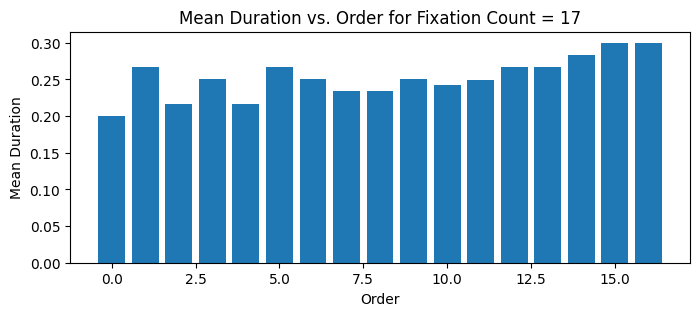

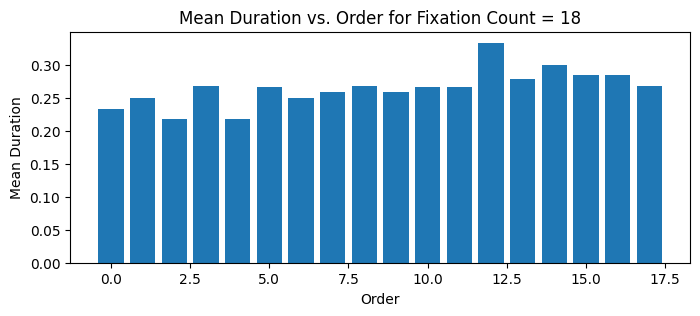

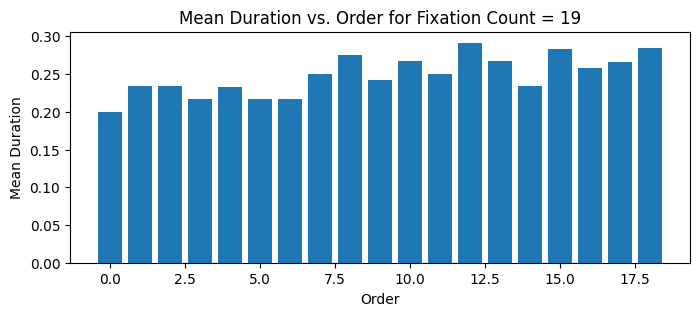

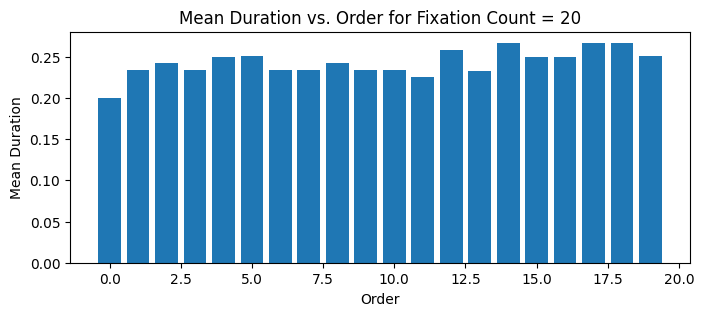

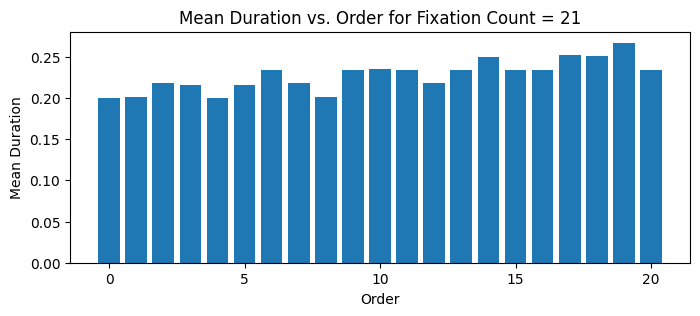

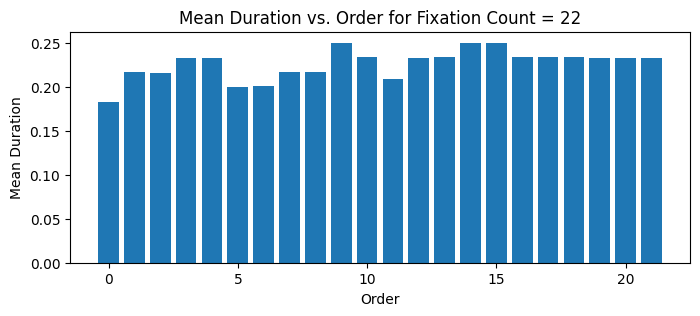

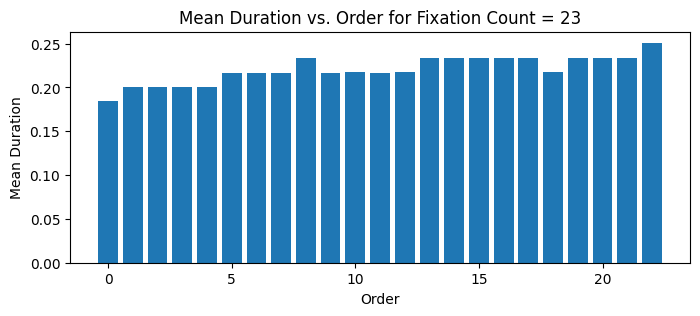

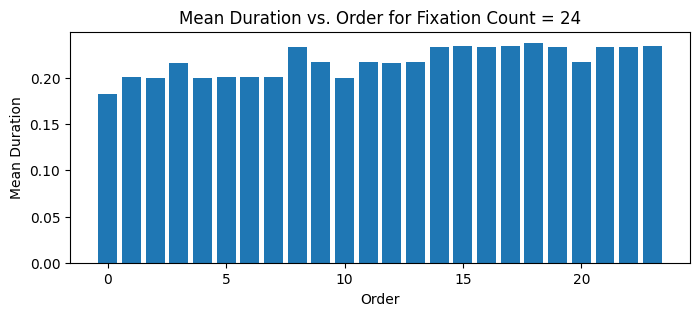

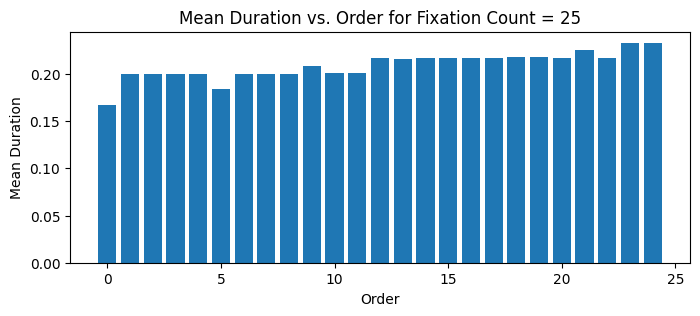

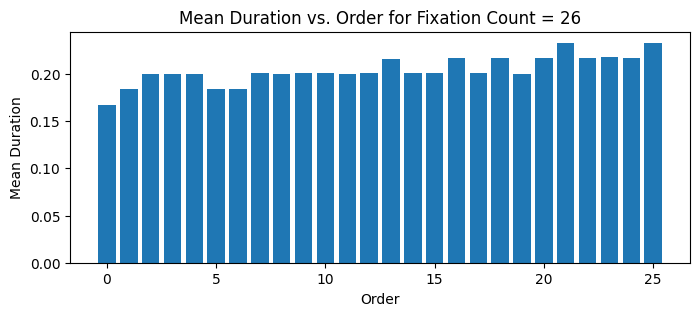

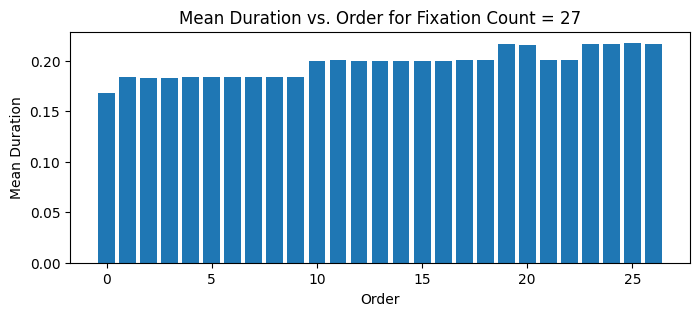

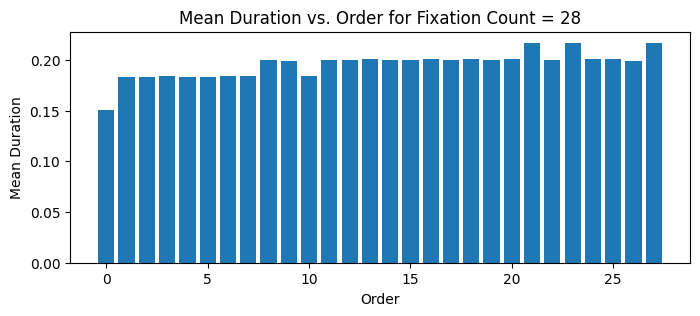

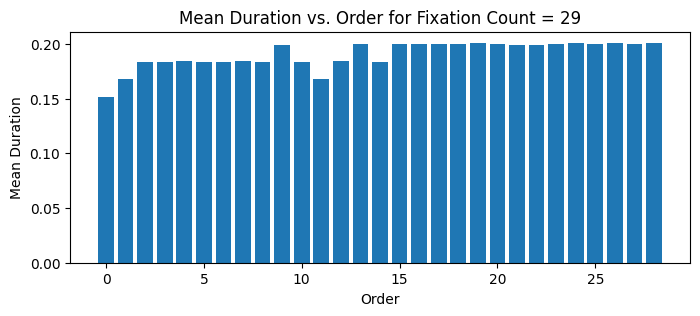

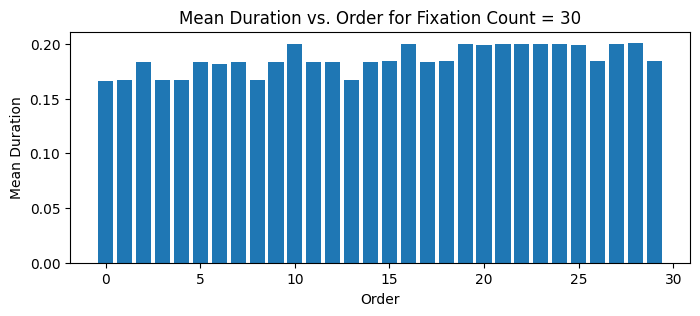

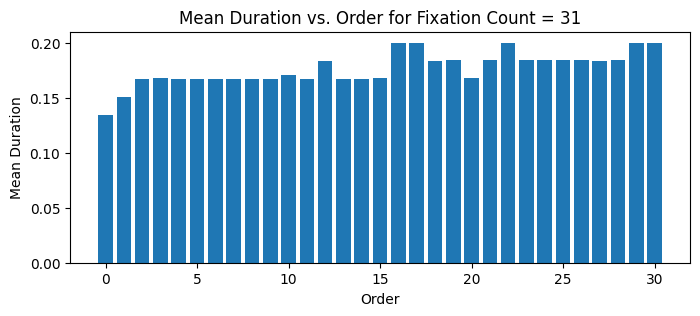

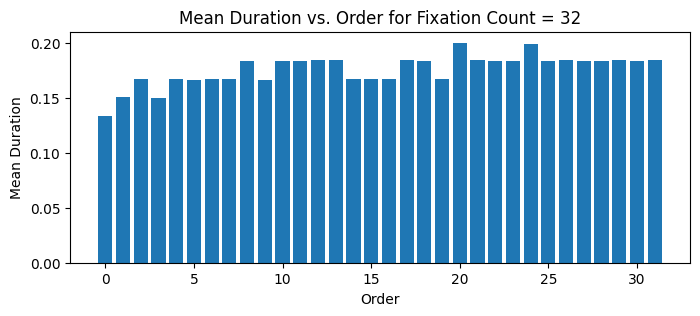

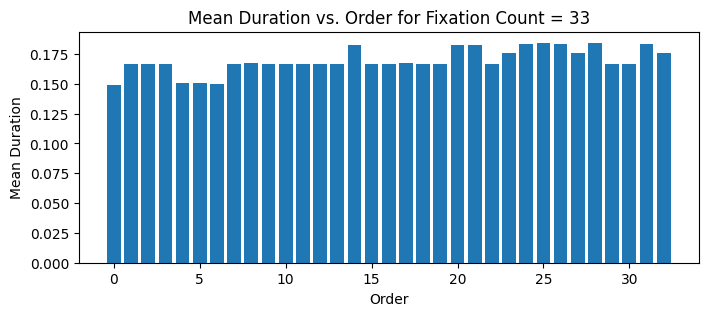

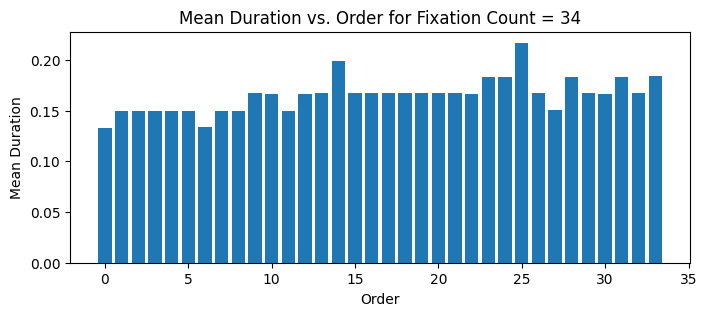

In [14]:
# prompt: for each fixation_count plot a bar plo with mean duration vs order

import matplotlib.pyplot as plt

# Group data by fixation_count and order, then calculate the mean duration
grouped_data = fix_df_with_counts.groupby(['fixation_count', 'order'])['duration'].median().reset_index()

# Iterate through unique fixation counts
for fixation_count in grouped_data['fixation_count'].unique():
  if fixation_count < 17 or fixation_count > 34:
    continue

  # Filter data for the current fixation count
  subset = grouped_data[grouped_data['fixation_count'] == fixation_count]

  # Create the bar plot
  plt.figure(figsize=(8, 3))
  plt.bar(subset['order'], subset['duration'])
  plt.xlabel('Order')
  plt.ylabel('Mean Duration')
  plt.title(f'Mean Duration vs. Order for Fixation Count = {fixation_count}')
  plt.show()

In [4]:
# prompt: print out the numner of id's for a given fixation_count, order by fixation_count

# Group the data by 'fixation_count' and count the number of unique IDs
id_counts_by_fixation = fix_df_with_counts.groupby('fixation_count')['id'].nunique().reset_index(name='id_count')

# Sort the result by 'fixation_count'
id_counts_by_fixation = id_counts_by_fixation.sort_values('fixation_count')

# Print the result
id_counts_by_fixation

,fixation_count,id_count
0,1,3
1,2,1
2,3,3
3,4,3
4,5,3
5,6,5
6,7,4
7,8,4
8,9,8
9,10,15


In [5]:
merged_df.head(2)

,Unnamed: 0_x,index,label,onset,duration,offset,avg_x,avg_y,ID,Order,Unnamed: 0_y,Gender,ROI1,ROI2,ROI3,Valid,Valid Freeviewing,age
0,0,0,FIXA,0.019,0.350,0.369,677.43,726.93,20230314113311129,0,0,MALE,Mermaid,Turtle,WomanOnBoat,True,True,34
1,1,2,FIXA,0.435,0.434,0.869,985.40,720.16,20230314113311129,1,0,MALE,Mermaid,Turtle,WomanOnBoat,True,True,34


In [6]:
fix_df = merged_df[['ID', 'age', 'Order', 'duration', 'Valid', 'Valid Freeviewing', 'onset']]
fix_df.columns = fix_df.columns.str.lower()
valid_fix_df = fix_df[(fix_df['valid'] == True) & (fix_df['valid freeviewing'] == True)]
valid_fix_df.head(2)

,id,age,order,duration,valid,valid freeviewing,onset
0,20230314113311129,34,0,0.350,True,True,0.019
1,20230314113311129,34,1,0.434,True,True,0.435


In [7]:
valid_fix_df.shape

(145836, 7)

In [8]:
# prompt: use valid_fix_df. Fix linear regression with duration as response and onset as covariate. Print the model parameters and statistical significance of coefficients

import statsmodels.formula.api as smf

# Fit the linear regression model
model = smf.ols('duration ~ onset', data=valid_fix_df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     209.1
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           2.31e-47
Time:                        11:53:54   Log-Likelihood:                 28951.
No. Observations:              145836   AIC:                        -5.790e+04
Df Residuals:                  145834   BIC:                        -5.788e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2444      0.001    247.050      0.0

<ipython-input-11-55ff6b851e61>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_fix_df['predicted_duration'] = model.predict(valid_fix_df)


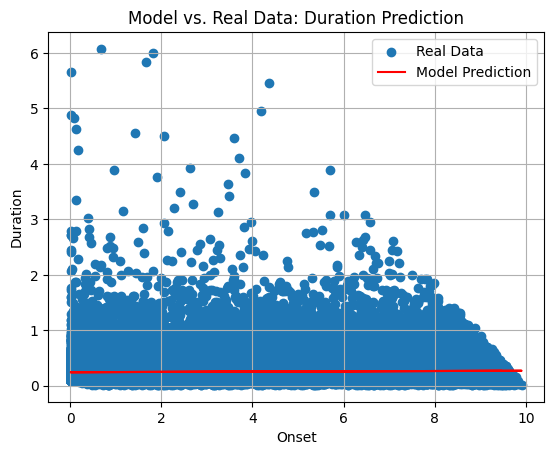

In [11]:
# prompt: plot model vs real data

import matplotlib.pyplot as plt

# Predict durations using the fitted model
valid_fix_df['predicted_duration'] = model.predict(valid_fix_df)

# Create the plot
#plt.figure(figsize=(10, 6))
plt.scatter(valid_fix_df['onset'], valid_fix_df['duration'], label='Real Data')
plt.plot(valid_fix_df['onset'], valid_fix_df['predicted_duration'], color='red', label='Model Prediction')
plt.xlabel('Onset')
plt.ylabel('Duration')
plt.title('Model vs. Real Data: Duration Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
valid_fix_df.head(40)

,id,age,order,duration,valid,valid freeviewing,onset,predicted_duration
0,20230314113311129,34,0,0.350,True,True,0.019,0.244418
1,20230314113311129,34,1,0.434,True,True,0.435,0.245532
2,20230314113311129,34,2,0.151,True,True,0.936,0.246874
3,20230314113311129,34,3,0.267,True,True,1.137,0.247412
4,20230314113311129,34,4,0.232,True,True,1.471,0.248307
5,20230314113311129,34,5,0.684,True,True,1.737,0.249020
6,20230314113311129,34,6,0.515,True,True,2.472,0.250988
7,20230314113311129,34,7,0.117,True,True,3.071,0.252593
8,20230314113311129,34,8,0.199,True,True,3.272,0.253131
9,20230314113311129,34,9,0.867,True,True,3.522,0.253801
